In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorflow/python/f

1.14.0


/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bocharick/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bocharick/anaconda3/lib/python3.7/site-package

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
train_labels = keras.utils.to_categorical(train_labels, len(class_names))
test_labels = keras.utils.to_categorical(test_labels, len(class_names))

In [4]:
train_images.shape

(60000, 28, 28, 1)

In [5]:
test_images.shape

(10000, 28, 28, 1)

In [6]:
train_labels.shape

(60000, 10)

In [7]:
test_labels.shape

(10000, 10)

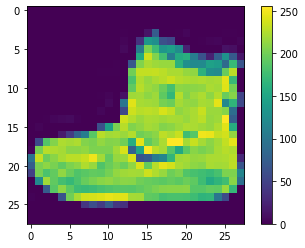

In [8]:
plt.figure()
plt.imshow(train_images[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
datagen = ImageDataGenerator(
  rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

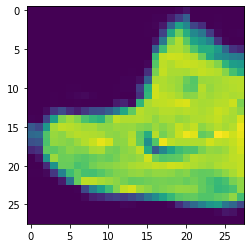

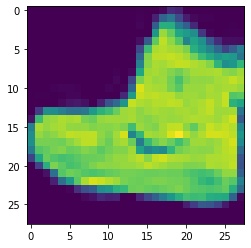

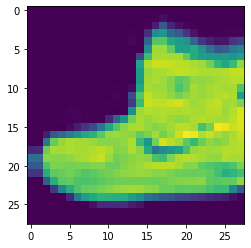

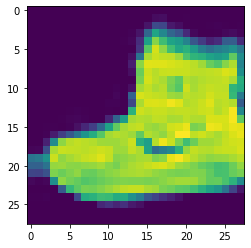

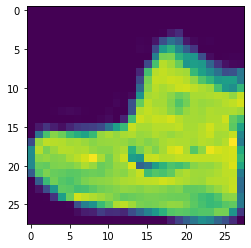

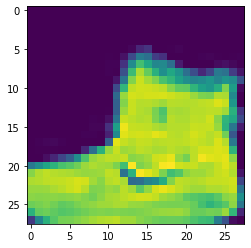

In [10]:
i = 0
data = train_images[0]
data = np.expand_dims(data, axis=0)
for batch in datagen.flow(data, batch_size=1):
    plt.figure(i)
    imfplot = plt.imshow(batch[0][:,:,0])
    i += 1
    if i % 6 == 0:
        break
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

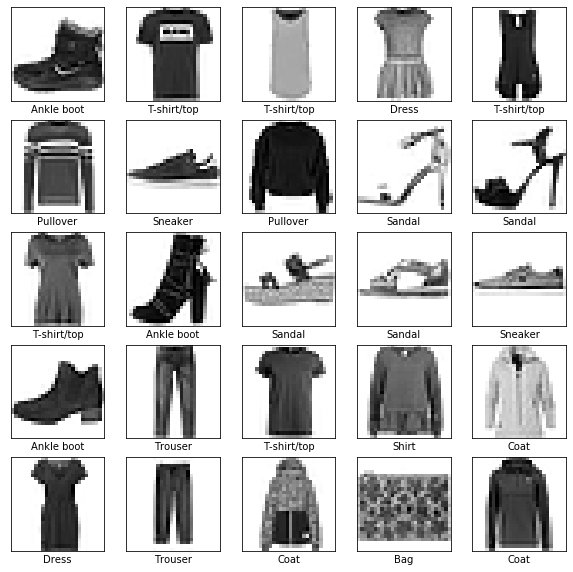

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(train_labels[i])])
plt.show()

In [13]:
#### VARIANT 1 ####
# tf.keras.backend.clear_session()

# DROPOUT_RATE = 0.2

# inputs = Input(shape=(28,28,1), name="Input")
# h_0 = Flatten()(inputs)
# #drop_0 = Dropout(DROPOUT_RATE, name="dropout_0")(h_0)
# h_1 = Dense(6024, activation='relu', name="hidden_1")(h_0)#(drop_0)
# drop_1 = Dropout(DROPOUT_RATE, name="dropout_1")(h_1)
# h_2 = Dense(6024, activation='relu', name="hidden_2")(drop_1)
# drop_2 = Dropout(DROPOUT_RATE, name="dropout_2")(h_2)
# h_3 = Dense(6024, activation='relu', name="hidden_3")(drop_2)
# drop_3 = Dropout(DROPOUT_RATE, name="dropout_3")(h_3)
# h_4 = Dense(6024, activation='relu', name="hidden_4")(drop_3)
# drop_4 = Dropout(DROPOUT_RATE, name="dropout_4")(h_4)
# h_5 = Dense(6024, activation='relu', name="hidden_5")(drop_4)
# drop_5 = Dropout(DROPOUT_RATE, name="dropout_5")(h_5)
# predictions = Dense(10, activation='softmax', name="Output")(drop_5)

# model = Model(inputs=inputs, outputs=predictions)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# print(model.summary())

In [14]:
#### VARIANT 2 ####
# tf.keras.backend.clear_session()

# DROPOUT_RATE = 0.2

# inputs = Input(shape=(28,28,1), name="Input")
# h_0 = Flatten()(inputs)

# h_1 = Dense(2048, activation='relu', name="hidden_1")(h_0)
# drop_1 = Dropout(DROPOUT_RATE, name="dropout_1")(h_1)
# h_2 = Dense(2048, activation='relu', name="hidden_2")(drop_1)
# drop_2 = Dropout(DROPOUT_RATE, name="dropout_2")(h_2)
# h_3 = Dense(2048, activation='relu', name="hidden_3")(drop_2)
# drop_3 = Dropout(DROPOUT_RATE, name="dropout_3")(h_3)
# h_4 = Dense(2048, activation='relu', name="hidden_4")(drop_3)
# drop_4 = Dropout(DROPOUT_RATE, name="dropout_4")(h_4)
# h_5 = Dense(2048, activation='relu', name="hidden_5")(drop_4)
# drop_5 = Dropout(DROPOUT_RATE, name="dropout_5")(h_5)

# h_1_2 = Dense(2048, activation='tanh', name="hidden_1_2")(h_0)
# drop_1_2 = Dropout(DROPOUT_RATE, name="dropout_1_2")(h_1_2)
# h_2_2 = Dense(2048, activation='tanh', name="hidden_2_2")(drop_1_2)
# drop_2_2 = Dropout(DROPOUT_RATE, name="dropout_2_2")(h_2_2)
# h_3_2 = Dense(2048, activation='tanh', name="hidden_3_2")(drop_2_2)
# drop_3_2 = Dropout(DROPOUT_RATE, name="dropout_3_2")(h_3_2)
# h_4_2 = Dense(2048, activation='tanh', name="hidden_4_2")(drop_3_2)
# drop_4_2 = Dropout(DROPOUT_RATE, name="dropout_4_2")(h_4_2)
# h_5_2 = Dense(2048, activation='tanh', name="hidden_5_2")(drop_4_2)
# drop_5_2 = Dropout(DROPOUT_RATE, name="dropout_5_2")(h_5_2)

# h_1_3 = Dense(2048, activation='sigmoid', name="hidden_1_3")(h_0)
# drop_1_3 = Dropout(DROPOUT_RATE, name="dropout_1_3")(h_1_3)
# h_2_3 = Dense(2048, activation='sigmoid', name="hidden_2_3")(drop_1_3)
# drop_2_3 = Dropout(DROPOUT_RATE, name="dropout_2_3")(h_2_3)
# h_3_3 = Dense(2048, activation='sigmoid', name="hidden_3_3")(drop_2_3)
# drop_3_3 = Dropout(DROPOUT_RATE, name="dropout_3_3")(h_3_3)
# h_4_3 = Dense(2048, activation='sigmoid', name="hidden_4_3")(drop_3_3)
# drop_4_3 = Dropout(DROPOUT_RATE, name="dropout_4_3")(h_4_3)
# h_5_3 = Dense(2048, activation='sigmoid', name="hidden_5_3")(drop_4_3)
# drop_5_3 = Dropout(DROPOUT_RATE, name="dropout_5_3")(h_5_3)

# concat = Concatenate()([drop_5, drop_5_2, drop_5_3])


# predictions = Dense(10, activation='softmax', name="Output")(concat)

# model = Model(inputs=inputs, outputs=predictions)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# print(model.summary())

In [15]:
#### VARIANT 3 ####
tf.keras.backend.clear_session()

DROPOUT_RATE = 0.2

inputs = Input(shape=(28,28,1), name="Input")
h_0 = Flatten()(inputs)

h_1 = Dense(2048, activation='relu', name="hidden_1")(h_0)
h_1_2 = Dense(2048, activation='tanh', name="hidden_1_2")(h_0)
h_1_3 = Dense(2048, activation='sigmoid', name="hidden_1_3")(h_0)
h_1_concat = Concatenate()([h_1, h_1_2, h_1_3])
drop_1 = Dropout(DROPOUT_RATE, name="dropout_1")(h_1_concat)

h_2 = Dense(2048, activation='relu', name="hidden_2")(drop_1)
h_2_2 = Dense(2048, activation='tanh', name="hidden_2_2")(drop_1)
h_2_3 = Dense(2048, activation='sigmoid', name="hidden_2_3")(drop_1)
h_2_concat = Concatenate()([h_2, h_2_2, h_2_3])
drop_2 = Dropout(DROPOUT_RATE, name="dropout_2")(h_2_concat)

h_3 = Dense(2048, activation='relu', name="hidden_3")(drop_2)
h_3_2 = Dense(2048, activation='tanh', name="hidden_3_2")(drop_2)
h_3_3 = Dense(2048, activation='sigmoid', name="hidden_3_3")(drop_2)
h_3_concat = Concatenate()([h_3, h_3_2, h_3_3])
drop_3 = Dropout(DROPOUT_RATE, name="dropout_3")(h_3_concat)

h_4 = Dense(2048, activation='relu', name="hidden_4")(drop_3)
h_4_2 = Dense(2048, activation='tanh', name="hidden_4_2")(drop_3)
h_4_3 = Dense(2048, activation='sigmoid', name="hidden_4_3")(drop_3)
h_4_concat = Concatenate()([h_4, h_4_2, h_4_3])
drop_4 = Dropout(DROPOUT_RATE, name="dropout_4")(h_4_concat)

h_5 = Dense(2048, activation='relu', name="hidden_5")(drop_4)
h_5_2 = Dense(2048, activation='tanh', name="hidden_5_2")(drop_4)
h_5_3 = Dense(2048, activation='sigmoid', name="hidden_5_3")(drop_4)
h_5_concat = Concatenate()([h_5, h_5_2, h_5_3])
drop_5 = Dropout(DROPOUT_RATE, name="dropout_5")(h_5_concat)

predictions = Dense(10, activation='softmax', name="Output")(drop_5)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           Input[0][0]                      
__________________________________________________________________________________________________
hidden_1 (Dense)                (None, 2048)         1607680     flatten[0][0]                    
__________________________________________________________________________________________________
hidden_1_2 (Dense)              (None, 2048)         1607680     flatten[0]

In [16]:
if tf.__version__.startswith("1."):
    val_acc_name = "val_acc"
    acc_name = "acc"
else:
    val_acc_name = "val_accuracy"
    acc_name = "accuracy"

In [17]:
checkpoint = ModelCheckpoint('mnist-fashion.hdf5',
                            monitor=val_acc_name,
                            save_best_only=True,
                            period=5,
                            verbose=1)

In [18]:
early_stopping_callback = EarlyStopping(monitor=val_acc_name, 
                                        min_delta=1e-7, 
                                        patience=30, 
                                        verbose=1, 
                                        mode='auto', 
                                        baseline=None, 
                                        restore_best_weights=True)

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor=val_acc_name,
                                           patience=5,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.000001)

In [20]:
%%time
BATCH_SIZE = 1024
EPOCHS = 10000000000
history = model.fit(datagen.flow(train_images, train_labels, batch_size=BATCH_SIZE),
                   epochs = EPOCHS,
                   validation_data=(test_images, test_labels),
                   steps_per_epoch=train_images.shape[0] // BATCH_SIZE,
                   verbose=1,
                   callbacks=[checkpoint, learning_rate_reduction, early_stopping_callback])

Epoch 1/10000000000
58/58 [==============================] - 14s 244ms/step - loss: 7.1558 - acc: 0.1266 - val_loss: 1.6856 - val_acc: 0.2737
Epoch 2/10000000000
58/58 [==============================] - 10s 173ms/step - loss: 1.4371 - acc: 0.4117 - val_loss: 0.8931 - val_acc: 0.6245
Epoch 3/10000000000
58/58 [==============================] - 10s 172ms/step - loss: 0.9631 - acc: 0.6280 - val_loss: 0.7095 - val_acc: 0.7066
Epoch 4/10000000000
58/58 [==============================] - 10s 173ms/step - loss: 0.8202 - acc: 0.6895 - val_loss: 0.6390 - val_acc: 0.7667
Epoch 5/10000000000
57/58 [============================>.] - ETA: 0s - loss: 0.7577 - acc: 0.7133
Epoch 00005: val_acc improved from -inf to 0.77960, saving model to mnist-fashion.hdf5
58/58 [==============================] - 29s 502ms/step - loss: 0.7582 - acc: 0.7130 - val_loss: 0.5839 - val_acc: 0.7796
Epoch 6/10000000000
58/58 [==============================] - 10s 176ms/step - loss: 0.7182 - acc: 0.7273 - val_loss: 0.5664 -

Epoch 47/10000000000
58/58 [==============================] - 10s 174ms/step - loss: 0.4022 - acc: 0.8462 - val_loss: 0.3495 - val_acc: 0.8695
Epoch 48/10000000000
58/58 [==============================] - 10s 176ms/step - loss: 0.4042 - acc: 0.8451 - val_loss: 0.3558 - val_acc: 0.8649
Epoch 49/10000000000
58/58 [==============================] - 10s 175ms/step - loss: 0.4010 - acc: 0.8465 - val_loss: 0.3456 - val_acc: 0.8674
Epoch 50/10000000000
57/58 [============================>.] - ETA: 0s - loss: 0.3951 - acc: 0.8484
Epoch 00050: val_acc did not improve from 0.86750
58/58 [==============================] - 10s 179ms/step - loss: 0.3945 - acc: 0.8486 - val_loss: 0.3539 - val_acc: 0.8617
Epoch 51/10000000000
58/58 [==============================] - 10s 179ms/step - loss: 0.3985 - acc: 0.8474 - val_loss: 0.3370 - val_acc: 0.8745
Epoch 52/10000000000
58/58 [==============================] - 10s 174ms/step - loss: 0.3953 - acc: 0.8490 - val_loss: 0.3550 - val_acc: 0.8647
Epoch 53/10000

Epoch 91/10000000000
58/58 [==============================] - 10s 174ms/step - loss: 0.3353 - acc: 0.8723 - val_loss: 0.3056 - val_acc: 0.8848
Epoch 92/10000000000
57/58 [============================>.] - ETA: 0s - loss: 0.3346 - acc: 0.8722
Epoch 00092: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
58/58 [==============================] - 10s 175ms/step - loss: 0.3350 - acc: 0.8720 - val_loss: 0.3042 - val_acc: 0.8853
Epoch 93/10000000000
58/58 [==============================] - 10s 176ms/step - loss: 0.3360 - acc: 0.8712 - val_loss: 0.3026 - val_acc: 0.8859
Epoch 94/10000000000
58/58 [==============================] - 10s 174ms/step - loss: 0.3349 - acc: 0.8710 - val_loss: 0.3029 - val_acc: 0.8848
Epoch 95/10000000000
57/58 [============================>.] - ETA: 0s - loss: 0.3326 - acc: 0.8713
Epoch 00095: val_acc improved from 0.88430 to 0.88710, saving model to mnist-fashion.hdf5
58/58 [==============================] - 29s 498ms/step - loss: 0.3323 - acc: 0.

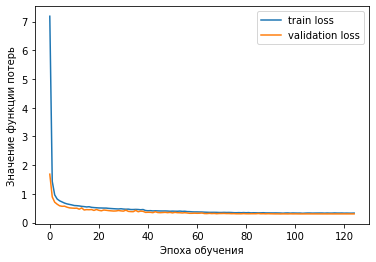

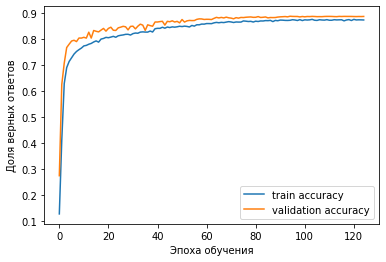

In [21]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции потерь')
plt.legend()

plt.figure()
plt.plot(history.history[acc_name], label='train accuracy')
plt.plot(history.history[val_acc_name], label='validation accuracy')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

plt.show()

In [22]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 190us/sample - loss: 0.3017 - acc: 0.8871


[0.30168763961791994, 0.8871]